In [1]:
import math
from sympy import *
import numpy as np

Griewank=lambda x,y:(10-10/(0.005*(x**2+y**2)-np.cos(x)*np.cos(y/math.sqrt(2))+2))

def getValue(data):
    return(Griewank(data[0],data[1]))

def getGrad(a,b): # a-x; b-y
    x,y=symbols('x y')
    var=[x,y]
    f=10-10/(0.005*(x**2+y**2)-cos(x)*cos(y/sqrt(2))+2) #Исходная функция в символьном исполнении
    grad_f = lambdify((x, y), derive_by_array(f, (x, y))) #массив с двумя функциями градиента по х и по у соотвественно

    return np.array(grad_f(a,b))

def getGradient(a, b):
    eps = 1e-6
    diff_x = (Griewank(a + eps, b) - Griewank(a - eps, b))/(2 * eps)
    diff_y = (Griewank(a, b + eps) - Griewank(a, b - eps))/(2 * eps)
    #print(diff_x)
    return np.array([diff_x,diff_y])

In [2]:
x = 5.67920780e+000
y = 1.52125037e-150
eps = 1e-6
value_1 = Griewank(x - eps, y)
value_2 = Griewank(x + eps, y)
print((value_2 - value_1)/(2 * eps))

value_1 = Griewank(x, y - eps)
value_2 = Griewank(x, y - eps)
print((value_2 - value_1)/(2 * eps))


Griewank(x,y)
print(getGrad(x,y))

-2.8542942382969727
0.0
[-2.85429424e+000  3.58104372e-150]


In [45]:
eps=0.00000001

counter=0
xy=np.array([2.0,2.0])

alfa=0.1
beta=1.1

moment=np.array([beta,beta])
minValue=int(1e20)

def setState(xy):
    return np.array([xy[0],xy[1]])

def getNewStateSimpleGradient(data,alfa,gradient):
    return data + alfa*gradient

def getNewStateGradDroblenie(data,alfa,gradient,beta):
    global counter
    new = data-alfa*(gradient**2+gradient)
    #print(getValue(new))
    #print(getValue(data))
    if (getValue(new) < getValue(data)):
        data = np.array([new[0],new[1]])
    else:
        if alfa < 0.1:
            counter+=1
            alfa=20
            if counter>2:
                counter=0
                new = data-0.32*(gradient)
                data = np.array([new[0],new[1]]) 
        alfa = alfa*0.9
        #print("alfa: ",alfa)
    return data,alfa


def getRandomalfa(data,gradient):
    global counter
    bestValue=setState(data)
    alfaArray = np.random.rand(10)
    alfaArray[7:]*=np.random.randint(10,100)
    for i in alfaArray:
        #print(i)
        data += -i*gradient
        #print("data: ",getValue(data))
        #print("bestValue: ",getValue(bestValue))
        if getValue(data) < getValue(bestValue):
            bestValue=setState(data)
            print(getValue(bestValue))
    return bestValue
        

def getNewStateMomentum_1(data,alfa,gradient):
    return data - alfa*(gradient*beta+gradient)
    

def getNewStateMomentum_2(data,alfa,beta,gradient): 
    global moment
    print(gradient)
    if gradient[0]<0:
        data[0] = data[0] - alfa*(gradient[0]-moment[0])
    else: 
        data[0] = data[0] - alfa*(gradient[0]+moment[0])
    
    if gradient[1]<0:
        data[1] = data[1] - alfa*(gradient[1]-moment[1])
    else: 
        data[1] = data[1] - alfa*(gradient[1]+moment[1])
    print(data)   
    return data    
    
        
    return data

def getNewStateSmartMomentum(data,alfa,beta,gradient,n_iter):
    last=np.array([data[0],data[1]])
    #data=last - alfa*(gradient**2*beta+gradient+moment)
    data =last - alfa*gradient

    state=data
    
    if Griewank(last[0],last[1]) < Griewank(data[0],data[1]):
        #print("last ", Griewank(last[0],last[1]))
        #print("xy ", Griewank(data[0],data[1]))
        for i in range(n_iter):
            #print(i)
            beta=beta*10
            data=last - alfa*(moment*beta+gradient)
            #data=last - alfa*(gradient**2*beta+gradient)
            #print(alfa*(gradient**2*beta+gradient+moment))
            state=last - alfa*gradient
            if Griewank(last[0],last[1]) > Griewank(data[0],data[1]):
                print(i)
                state=data
                break
    return state       
    
for i in range(int(1e5)):
    
    track = np.array([xy[0],xy[1]])
    gradient = getGradient(xy[0],xy[1])
    
    #xy=getRandomalfa(track,gradient)
    
    xy = getNewStateSimpleGradient(track,alfa,gradient)
    #xy,alfa = getNewStateGradDroblenie(track,alfa,gradient,beta)
    #xy=getNewStateMomentum_1(track,alfa,beta,gradient)
    #xy=getNewStateMomentum_2(track,alfa,beta,gradient)
    #xy=getNewStateSmartMomentum(track,alfa,beta,gradient,100)
    #xy += -alfa_1*gradient
    #print(xy[0],track[0])
    #print(Griewank(xy[0],xy[1]),Griewank(track[0],track[1]))

    if (np.linalg.norm(gradient) < eps) :
        #print("track ", Griewank(track[0],track[1]))
        #print("xy ", Griewank(xy[0],xy[1]))
        break
    
        
print("------------------------") 
print(i)
print("Градиент = ",gradient)
print("Массив х и у = ",xy)
print("Значение функции = ",Griewank(xy[0],xy[1]))



------------------------
343
Градиент =  [ 0.00000000e+00 -9.76996262e-09]
Массив х и у =  [3.17333129e+00 1.74840125e-08]
Значение функции =  6.721146489025894


In [43]:
import math
import random 

xy=np.array([5.0,16.0])
track=np.array([random.uniform(-16.0,16.0),random.uniform(-16.0,16.0)])  
    
t_max=100
t_min=0.1
cooling = 0.9999
t = t_max   

minValue=int(1e-20)

def getProbability(E,T):
    return pow(math.e,-1000*E/T)

def checkForBoundaries(x):
    if x>16:
        x=16
    return x

def setState(x,y):
    return np.array([x,y])

def getNewPoint(t,minState):
    randomValue = np.random.rand()*20*t/t_max
    x=checkForBoundaries(random.uniform(minState[0]-randomValue,minState[0]+randomValue))
    y=checkForBoundaries(random.uniform(minState[1]-randomValue,minState[1]+randomValue))
    return x,y

while t>t_min:
    if getValue(track)>minValue:
        minValue = getValue(track)
        minState = track
    #print(t)
    delta = getValue(xy)-getValue(track)
    if (delta < 0 and getProbability(delta,t)>np.random.rand()*2 ) :
        xy = setState(track[0],track[1])
        x,y=getNewPoint(t,minState)
        track = setState(x,y)
    else:   
        xy = setState(track[0],track[1])
        x,y=getNewPoint(t,minState)
        track = setState(x,y)
    t = t*cooling    
    
print("------------------------") 
print("Минимальное значение: ", minValue)
print("Массив х и у = ",xy)
print("Значение функции = ",Griewank(xy[0],xy[1]))

        

------------------------
Минимальное значение:  9.999996849048394
Массив х и у =  [-25160.46485927  -1295.91669199]
Значение функции =  9.999996849048394


In [55]:
print(np.random.rand(10)[8:])

[0.41679904 0.47299914]


<IPython.core.display.Javascript object>


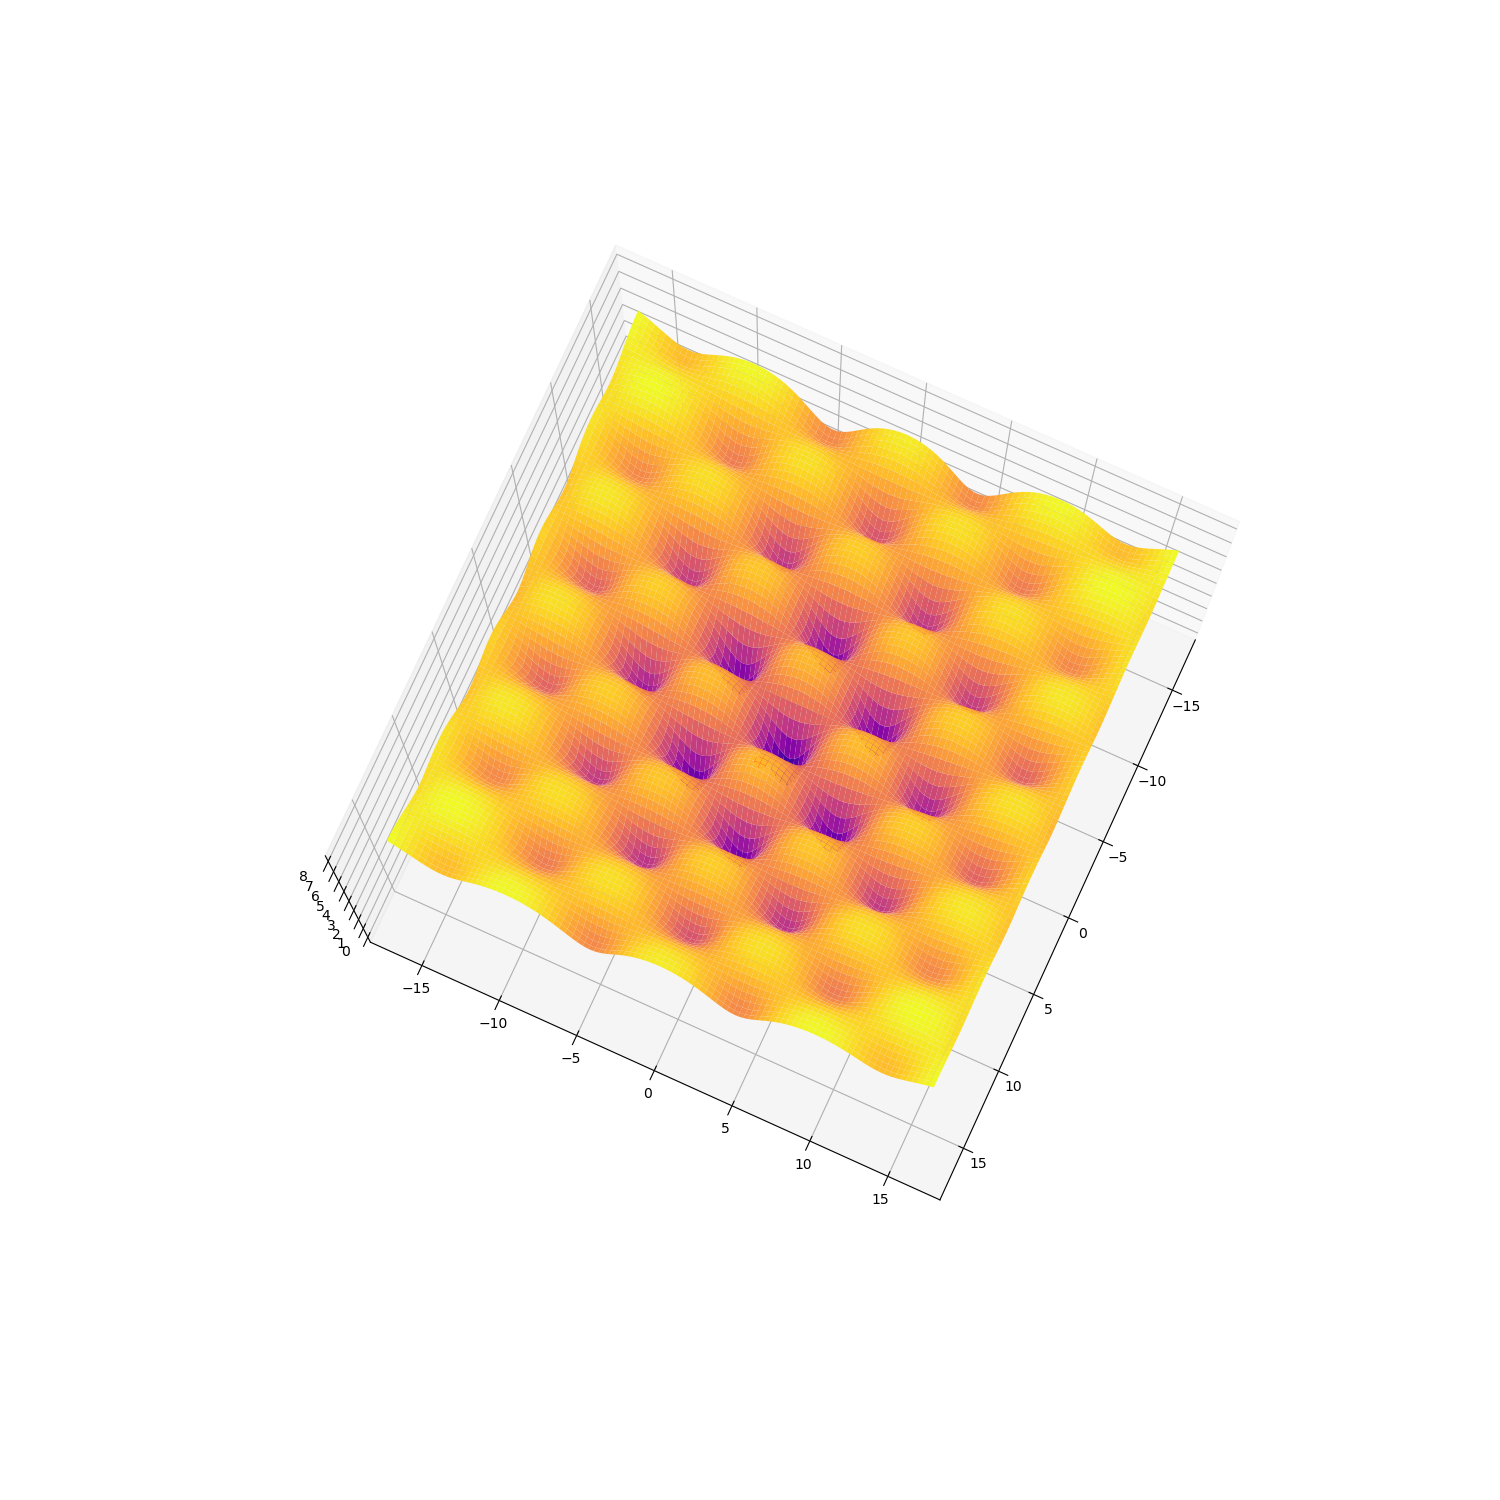

In [46]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
#Отображение поверхности
xval=np.linspace(-16,16,1000)
yval=np.linspace(-16,16,1000)
#print(xval)
x,y = np.meshgrid(xval,yval)
#print(x)
z=Griewank(x,y)

ztrack=Griewank(track[0],track[1])


fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
surf = ax.plot_surface(x, y, z, rstride = 10,cstride = 10,cmap = cm.plasma)
dots = ax.scatter(xy[0],xy[1],ztrack,color="r",linewidths=5)  
    

In [216]:
func = lambda x,y: x**2+x*y**2
def getGrad(a,b): # a-x; b-y
    x,y=symbols('x y')
    var=[x,y]
    f=x**2+x*y**2 #Исходная функция в символьном исполнении
    print(derive_by_array(f, (x, y)))
    grad_f = lambdify((x, y), derive_by_array(f, (x, y))) #массив с двумя функциями градиента по х и по у соотвественно
    print(grad_f(a,b))
    return np.array(grad_f(a,b))

def getGradient(a, b):
    eps = 1e-6
    diff_x = (func(a + eps, b) - func(a - eps, b))/(2 * eps)
    diff_y = (func(a, b + eps) - func(a, b - eps))/(2 * eps)
    #print(diff_x)
    return np.array([diff_x,diff_y])

a=getGrad(1,1)
b=getGradient(1,1)
print(b)


[2*x + y**2, 2*x*y]
[3, 2]
[3. 2.]
